In [1]:
import pandas as pd

In [2]:
!pip install yfinance
import yfinance as yf

In [3]:
obj = yf.Ticker("C")

In [4]:
dfSusTable = obj.sustainability.T
dfSusTable["ticker"] = obj.ticker
dfSusTable

,adult,alcoholic,animalTesting,catholic,coal,controversialWeapons,environmentPercentile,environmentScore,esgPerformance,furLeather,...,pesticides,ratingMonth,ratingYear,relatedControversy,smallArms,socialPercentile,socialScore,tobacco,totalEsg,ticker
esgScores,False,False,False,False,False,False,None,1.8,AVG_PERF,False,...,False,9,2023,[Business Ethics Incidents],False,None,13.75,False,29.24,C


In [5]:
import requests 
wikiPg = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies").text
dfSpx = pd.read_html(wikiPg)[0]

/var/folders/m4/py2v9t557sn5pwgbcr52g5g40000gn/T/ipykernel_1283/1509822774.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfSpx = pd.read_html(wikiPg)[0]


In [6]:
IstTickers = dfSpx[dfSpx["GICS Sector"] == "Energy"]["Symbol"].tolist()
IstTickers

['APA',
 'BKR',
 'CVX',
 'COP',
 'CTRA',
 'DVN',
 'FANG',
 'EOG',
 'EQT',
 'XOM',
 'HAL',
 'HES',
 'KMI',
 'MRO',
 'MPC',
 'OXY',
 'OKE',
 'PSX',
 'SLB',
 'TRGP',
 'VLO',
 'WMB']

In [7]:
dfSusTable.head()

,adult,alcoholic,animalTesting,catholic,coal,controversialWeapons,environmentPercentile,environmentScore,esgPerformance,furLeather,...,pesticides,ratingMonth,ratingYear,relatedControversy,smallArms,socialPercentile,socialScore,tobacco,totalEsg,ticker
esgScores,False,False,False,False,False,False,None,1.8,AVG_PERF,False,...,False,9,2023,[Business Ethics Incidents],False,None,13.75,False,29.24,C


In [8]:
dfSusTable = pd.DataFrame()
for x in IstTickers:
    obj = yf.Ticker(x)
    if obj.sustainability is not None:
        v = obj.sustainability.T
        v["ticker"] = obj.ticker
        dfSusTable = pd.concat([dfSusTable, v], ignore_index=True)
        print (" : ".join([x, "done"]))
    else:
        print (" : ".join([x, "NA"]))

APA : done


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BKR?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=BKR&crumb=6MzU7hZCGaP


BKR : done
CVX : done
COP : done
CTRA : done
DVN : done


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FANG?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=FANG&crumb=6MzU7hZCGaP


FANG : done
EOG : done
EQT : done
XOM : done
HAL : done
HES : done
KMI : done
MRO : done
MPC : done
OXY : done
OKE : done
PSX : done
SLB : done
TRGP : done
VLO : done
WMB : done


In [9]:
print(dfSusTable.head())

   adult alcoholic animalTesting catholic   coal controversialWeapons  \
0  False     False         False    False  False                False   
1  False     False          True    False  False                False   
2  False     False         False    False  False                False   
3  False     False         False    False  False                False   
4  False     False         False    False  False                False   

  environmentPercentile environmentScore esgPerformance furLeather  ...  \
0                  None            21.98       OUT_PERF      False  ...   
1                  None            17.01       OUT_PERF      False  ...   
2                  None            17.57       OUT_PERF      False  ...   
3                  None            20.26       OUT_PERF      False  ...   
4                  None            17.67       OUT_PERF      False  ...   

  pesticides ratingMonth ratingYear  \
0      False           3       2021   
1      False           9       2

In [10]:
print(IstTickers)

['APA', 'BKR', 'CVX', 'COP', 'CTRA', 'DVN', 'FANG', 'EOG', 'EQT', 'XOM', 'HAL', 'HES', 'KMI', 'MRO', 'MPC', 'OXY', 'OKE', 'PSX', 'SLB', 'TRGP', 'VLO', 'WMB']


In [11]:
dfSusTable.set_index("ticker", inplace = True)

In [12]:
dfSusTable.T

ticker,APA,CVX,COP,CTRA,DVN,EOG,EQT,XOM,HAL,HES,KMI,MRO,MPC,OXY,OKE,PSX,SLB,TRGP,VLO,WMB
adult,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
alcoholic,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
animalTesting,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
catholic,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
coal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
controversialWeapons,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
environmentPercentile,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
environmentScore,21.98,17.01,17.57,20.26,17.67,20.16,17.66,23.11,9.79,18.93,8.28,21.07,17.09,24.98,10.83,20.76,8.08,14.23,20.15,8.72
esgPerformance,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,LEAD_PERF,AVG_PERF,OUT_PERF,UNDER_PERF,OUT_PERF,OUT_PERF,LEAD_PERF,AVG_PERF,OUT_PERF,AVG_PERF,OUT_PERF,OUT_PERF,AVG_PERF
furLeather,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
??yf

Type:        module
String form: <module 'yfinance' from '/opt/anaconda3/lib/python3.11/site-packages/yfinance/__init__.py'>
File:        /opt/anaconda3/lib/python3.11/site-packages/yfinance/__init__.py
Source:     
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# yfinance - market data downloader
# https://github.com/ranaroussi/yfinance
#
# Copyright 2017-2019 Ran Aroussi
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

from . import version
from .ticker import Ticker
from .tickers import Tick

In [14]:
import requests 
import json

In [15]:
dfSusTable.sort_values("totalEsg",inplace = True)
dfSusTable.T

ticker,KMI,SLB,WMB,OKE,HAL,MPC,VLO,HES,TRGP,DVN,COP,EOG,PSX,EQT,CTRA,CVX,MRO,APA,XOM,OXY
adult,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
alcoholic,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
animalTesting,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
catholic,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
coal,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
controversialWeapons,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
environmentPercentile,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
environmentScore,8.28,8.08,8.72,10.83,9.79,17.09,20.15,18.93,14.23,17.67,17.57,20.16,20.76,17.66,20.26,17.01,21.07,21.98,23.11,24.98
esgPerformance,UNDER_PERF,AVG_PERF,AVG_PERF,AVG_PERF,AVG_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,OUT_PERF,LEAD_PERF,LEAD_PERF
furLeather,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
dfFx = yf.download(" ".join(IstTickers),start="2015-01-01")["Adj Close"]

[*********************100%***********************]  22 of 22 completed


In [17]:
IstTickers = dfSusTable.index.to_list()
dfSusTable.shape

(20, 36)

In [18]:
dfFx.fillna(method="ffill",inplace = True)
dfFx.fillna(method="bfill",inplace = True)

FirstLag = IstTickers[:6]
seriesLag =dfFx[FirstLag].sum(axis=1)
seriesLag /= seriesLag[0]

FirstLead = IstTickers[13:]
seriesLead =dfFx[FirstLead].sum(axis=1)
seriesLead /= seriesLead[0]


/var/folders/m4/py2v9t557sn5pwgbcr52g5g40000gn/T/ipykernel_1283/2738200582.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfFx.fillna(method="ffill",inplace = True)
/var/folders/m4/py2v9t557sn5pwgbcr52g5g40000gn/T/ipykernel_1283/2738200582.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfFx.fillna(method="bfill",inplace = True)
/var/folders/m4/py2v9t557sn5pwgbcr52g5g40000gn/T/ipykernel_1283/2738200582.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  seriesLag /= seriesLag[0]
/var/folders/m4/py2v9t557sn5pwgbcr52g5g40000gn/T/ipykernel_1283/2738200582.py:10: FutureWarning: Series.__getitem__ treating keys as po

In [19]:
dfRes = pd.concat([seriesLag, seriesLead], axis = 1)
dfRes.columns = ["Lead","Lag"]
dfRes.plot

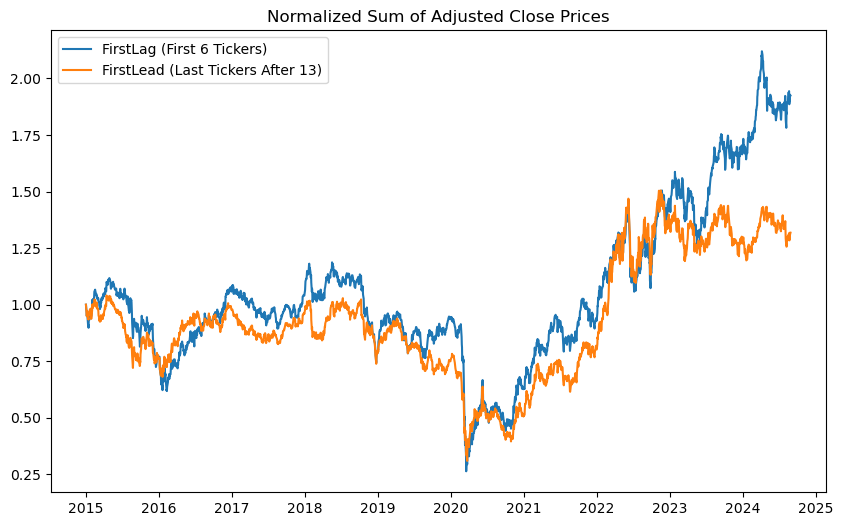

Date
2015-01-02 00:00:00+00:00    1.000000
2015-01-05 00:00:00+00:00    0.968600
2015-01-06 00:00:00+00:00    0.950699
2015-01-07 00:00:00+00:00    0.956140
2015-01-08 00:00:00+00:00    0.971903
                               ...   
2024-08-20 00:00:00+00:00    1.886073
2024-08-21 00:00:00+00:00    1.895768
2024-08-22 00:00:00+00:00    1.897380
2024-08-23 00:00:00+00:00    1.928717
2024-08-26 00:00:00+00:00    1.924355
Length: 2428, dtype: float64

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(seriesLag, label="FirstLag (First 6 Tickers)")
plt.plot(seriesLead, label="FirstLead (Last Tickers After 13)")
plt.legend()
plt.title("Normalized Sum of Adjusted Close Prices")
plt.show()

seriesLag